In [1]:
#import thinkplot
#import thinkstats2
import pandas as pd
import numpy as np
import math
import scipy.stats as ss
import thinkplot
import thinkstats2
from sklearn.metrics import mean_squared_error
from sklearn.linear_model import LinearRegression

##Seaborn for fancy plots. 
import matplotlib.pyplot as plt
import seaborn as sns
plt.rcParams["figure.figsize"] = (15,5)

# Quiz 2 - Get Hyp'

<ul>
<li> Use this as a starting point for your work, but answer the questions on Moodle. 
<li> Publish this to your GitHub and submit the link in the question on Moodle. 
</ul>

## Potentially Useful Information

#### Data Dictionary
<ul>
<li>credit.policy: 1 if the customer meets the credit underwriting criteria of LendingClub.com, and 0 otherwise.
<li>purpose: The purpose of the loan (takes values "credit_card", "debt_consolidation", "educational", "major_purchase", "small_business", and "all_other").
<li>int.rate: The interest rate of the loan, as a proportion (a rate of 11% would be stored as 0.11). Borrowers judged by LendingClub.com to be more risky are assigned higher interest rates.
<li>installment: The monthly installments owed by the borrower if the loan is funded.
<li>log.annual.inc: The natural log of the self-reported annual income of the borrower.
<li>dti: The debt-to-income ratio of the borrower (amount of debt divided by annual income).
<li>fico: The FICO credit score of the borrower.
<li>days.with.cr.line: The number of days the borrower has had a credit line.
<li>revol.bal: The borrower's revolving balance (amount unpaid at the end of the credit card billing cycle).
<li>revol.util: The borrower's revolving line utilization rate (the amount of the credit line used relative to total credit available).
<li>inq.last.6mths: The borrower's number of inquiries by creditors in the last 6 months.
<li>not.fully.paid: 1 if the borrower failed to repay their loan, 0 if they have not failed
</ul>

#### FICO Score Groups

![FICO](fico_range.png "FICO Ranges")

#### Note on ANOVA - Might be Useful, Might Not

> @JeremyMiles is right. First, there's a rule of thumb that the ANOVA is robust to heterogeneity of variance so long as the largest variance is not more than 4 times the smallest variance. Furthermore, the general effect of heterogeneity of variance is to make the ANOVA less efficient. That is, you would have lower power. Since you have a significant effect anyway, there is less reason to be concerned here. 
- https://stats.stackexchange.com/questions/56971/alternative-to-one-way-anova-unequal-variance

In [2]:
# Please don't alter this part. 
df = pd.read_csv("loan_data.csv")
df.drop(columns={"delinq.2yrs", "pub.rec"}, inplace=True)
df.head()

credit.policy             purpose  int.rate  installment  log.annual.inc  \
0              1  debt_consolidation    0.1189       829.10       11.350407   
1              1         credit_card    0.1071       228.22       11.082143   
2              1  debt_consolidation    0.1357       366.86       10.373491   
3              1  debt_consolidation    0.1008       162.34       11.350407   
4              1         credit_card    0.1426       102.92       11.299732   

     dti  fico  days.with.cr.line  revol.bal  revol.util  inq.last.6mths  \
0  19.48   737        5639.958333      28854        52.1               0   
1  14.29   707        2760.000000      33623        76.7               0   
2  11.63   682        4710.000000       3511        25.6               1   
3   8.10   712        2699.958333      33667        73.2               1   
4  14.97   667        4066.000000       4740        39.5               0   

   not.fully.paid  
0               0  
1               0  
2               0  
3               0  
4               0

### Visualize/Explore Data - If You Want, You Do You

In [3]:
df["income"] =np.exp(df["log.annual.inc"])
df.describe()

credit.policy     int.rate  installment  log.annual.inc          dti  \
count    9578.000000  9578.000000  9578.000000     9578.000000  9578.000000   
mean        0.804970     0.122640   319.089413       10.932117    12.606679   
std         0.396245     0.026847   207.071301        0.614813     6.883970   
min         0.000000     0.060000    15.670000        7.547502     0.000000   
25%         1.000000     0.103900   163.770000       10.558414     7.212500   
50%         1.000000     0.122100   268.950000       10.928884    12.665000   
75%         1.000000     0.140700   432.762500       11.291293    17.950000   
max         1.000000     0.216400   940.140000       14.528354    29.960000   

              fico  days.with.cr.line     revol.bal   revol.util  \
count  9578.000000        9578.000000  9.578000e+03  9578.000000   
mean    710.846314        4560.767197  1.691396e+04    46.799236   
std      37.970537        2496.930377  3.375619e+04    29.014417   
min     612.000000         178.958333  0.000000e+00     0.000000   
25%     682.000000        2820.000000  3.187000e+03    22.600000   
50%     707.000000        4139.958333  8.596000e+03    46.300000   
75%     737.000000        5730.000000  1.824950e+04    70.900000   
max     827.000000       17639.958330  1.207359e+06   119.000000   

       inq.last.6mths  not.fully.paid        income  
count     9578.000000     9578.000000  9.578000e+03  
mean         1.577469        0.160054  6.840203e+04  
std          2.200245        0.366676  6.122753e+04  
min          0.000000        0.000000  1.896000e+03  
25%          0.000000        0.000000  3.850000e+04  
50%          1.000000        0.000000  5.576400e+04  
75%          2.000000        0.000000  8.012100e+04  
max         33.000000        1.000000  2.039784e+06

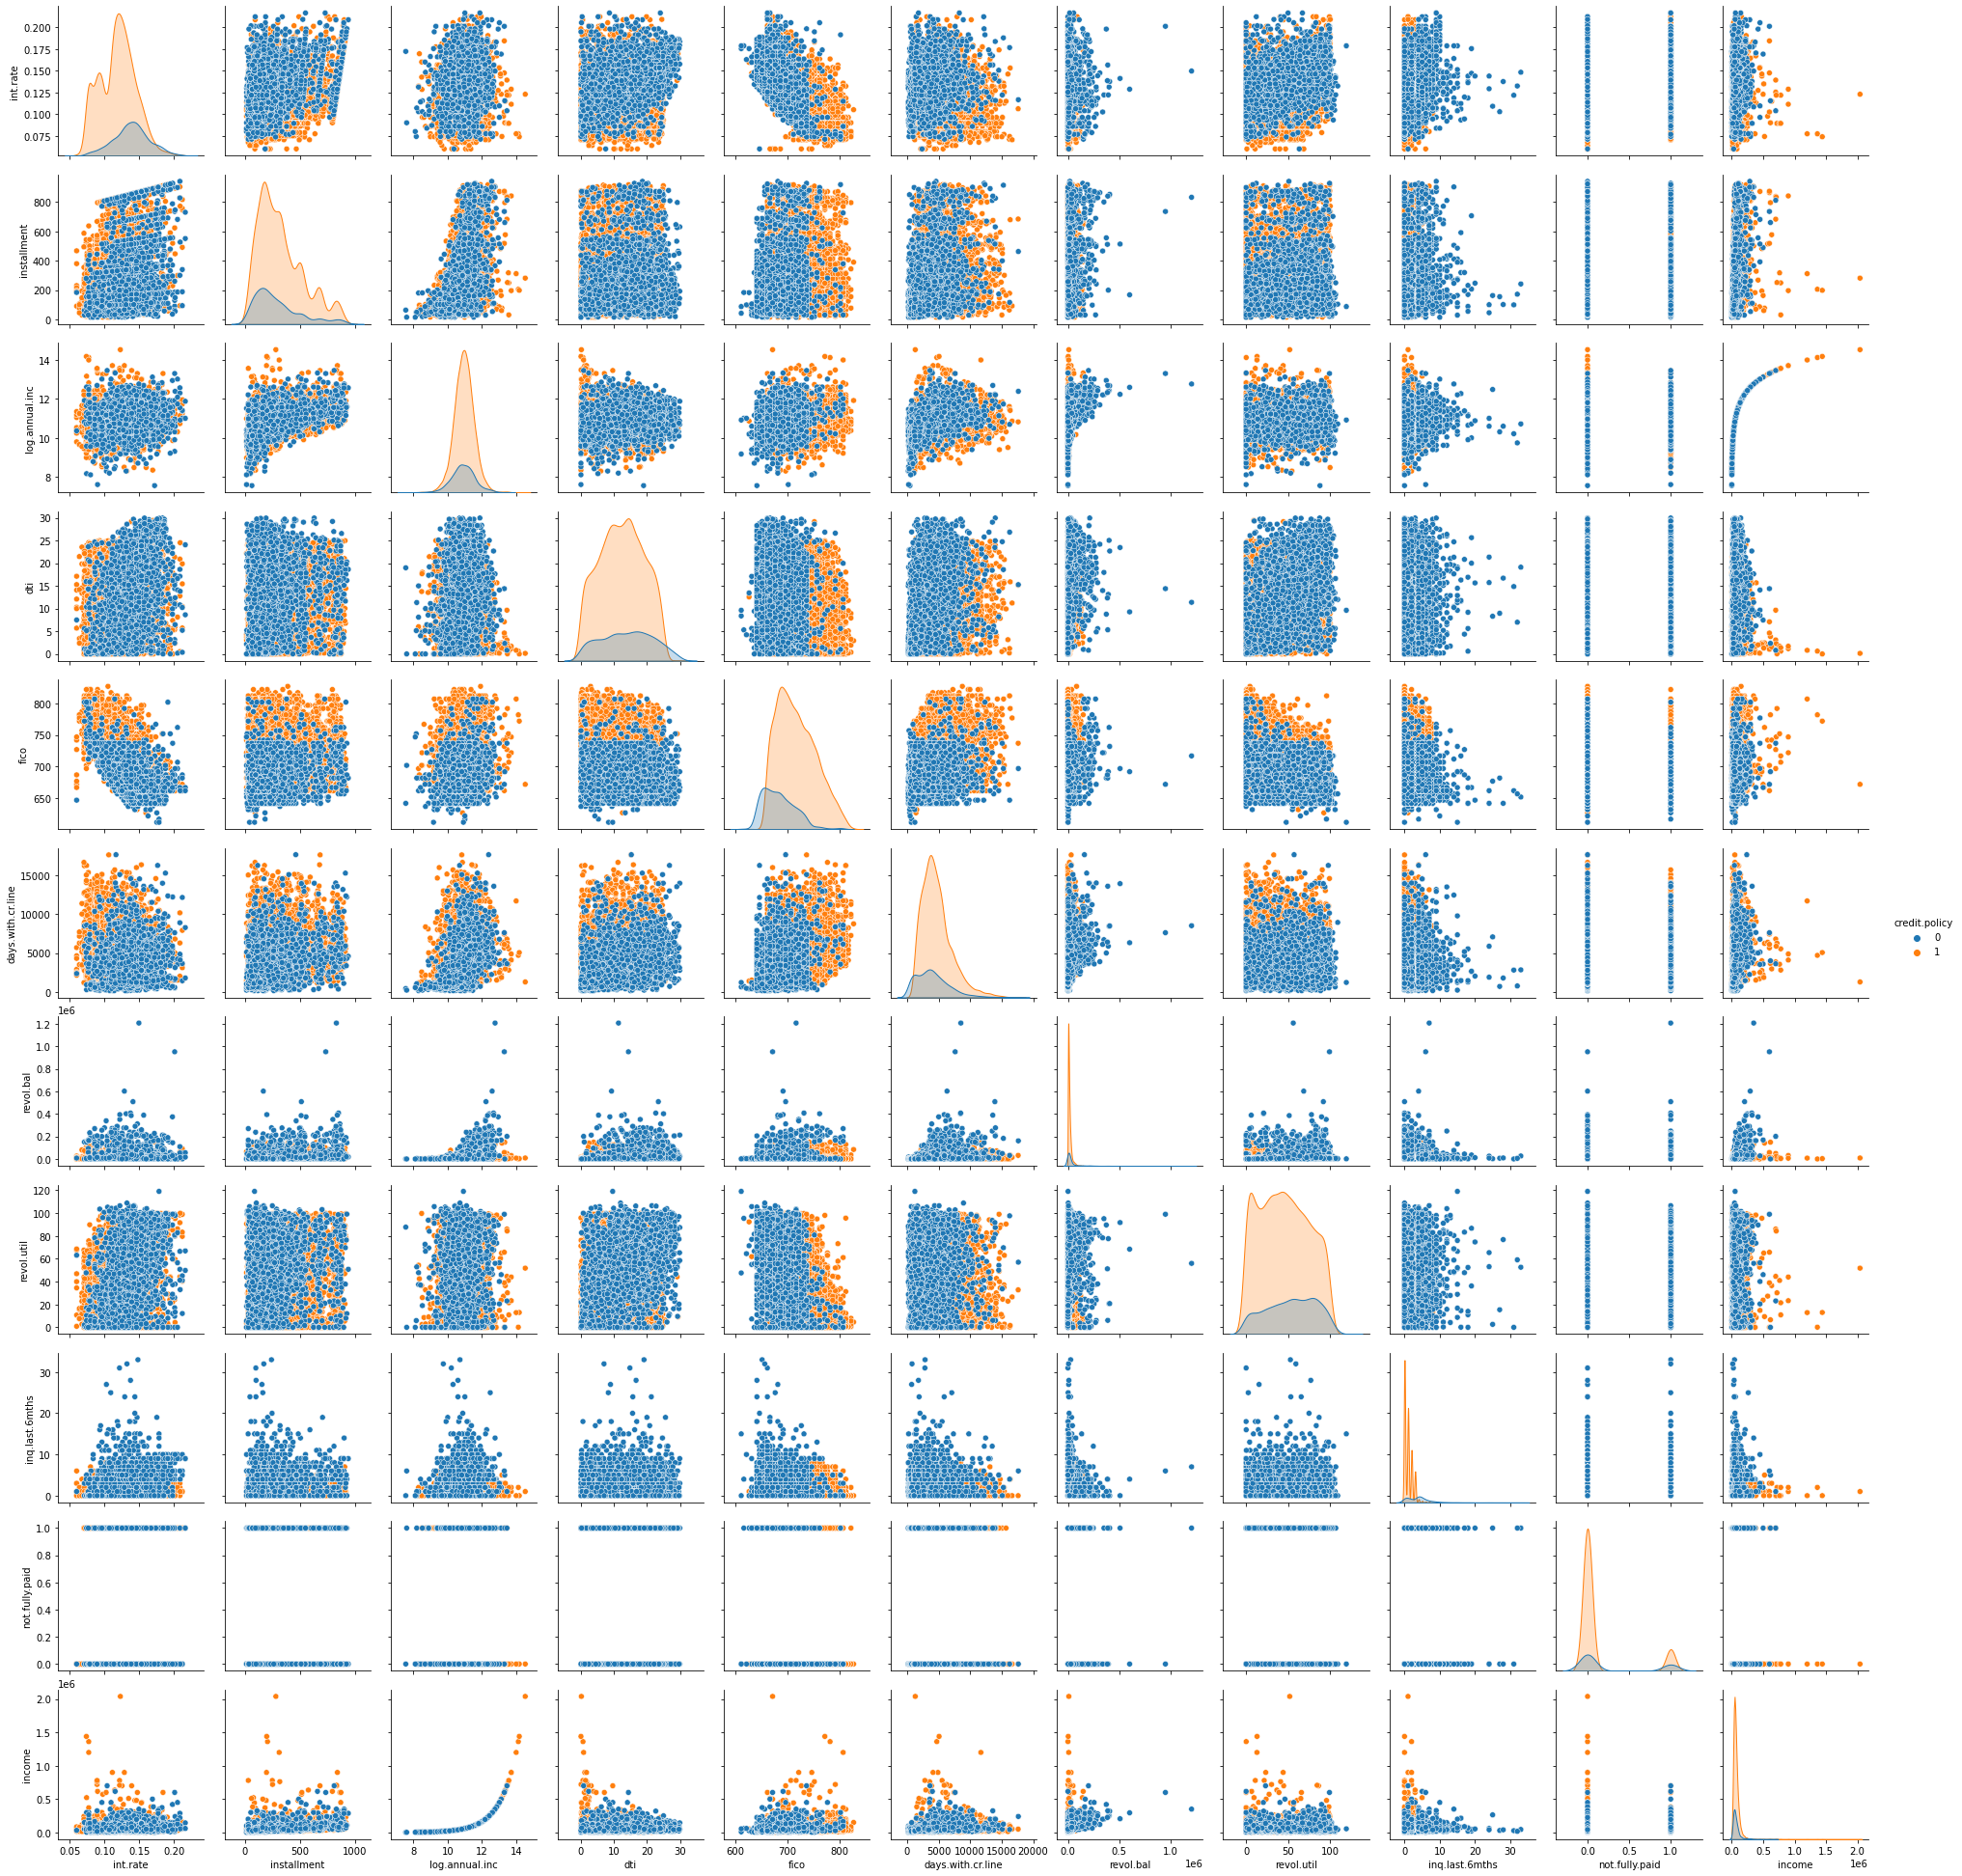

In [4]:
sns.pairplot(df,hue="credit.policy")

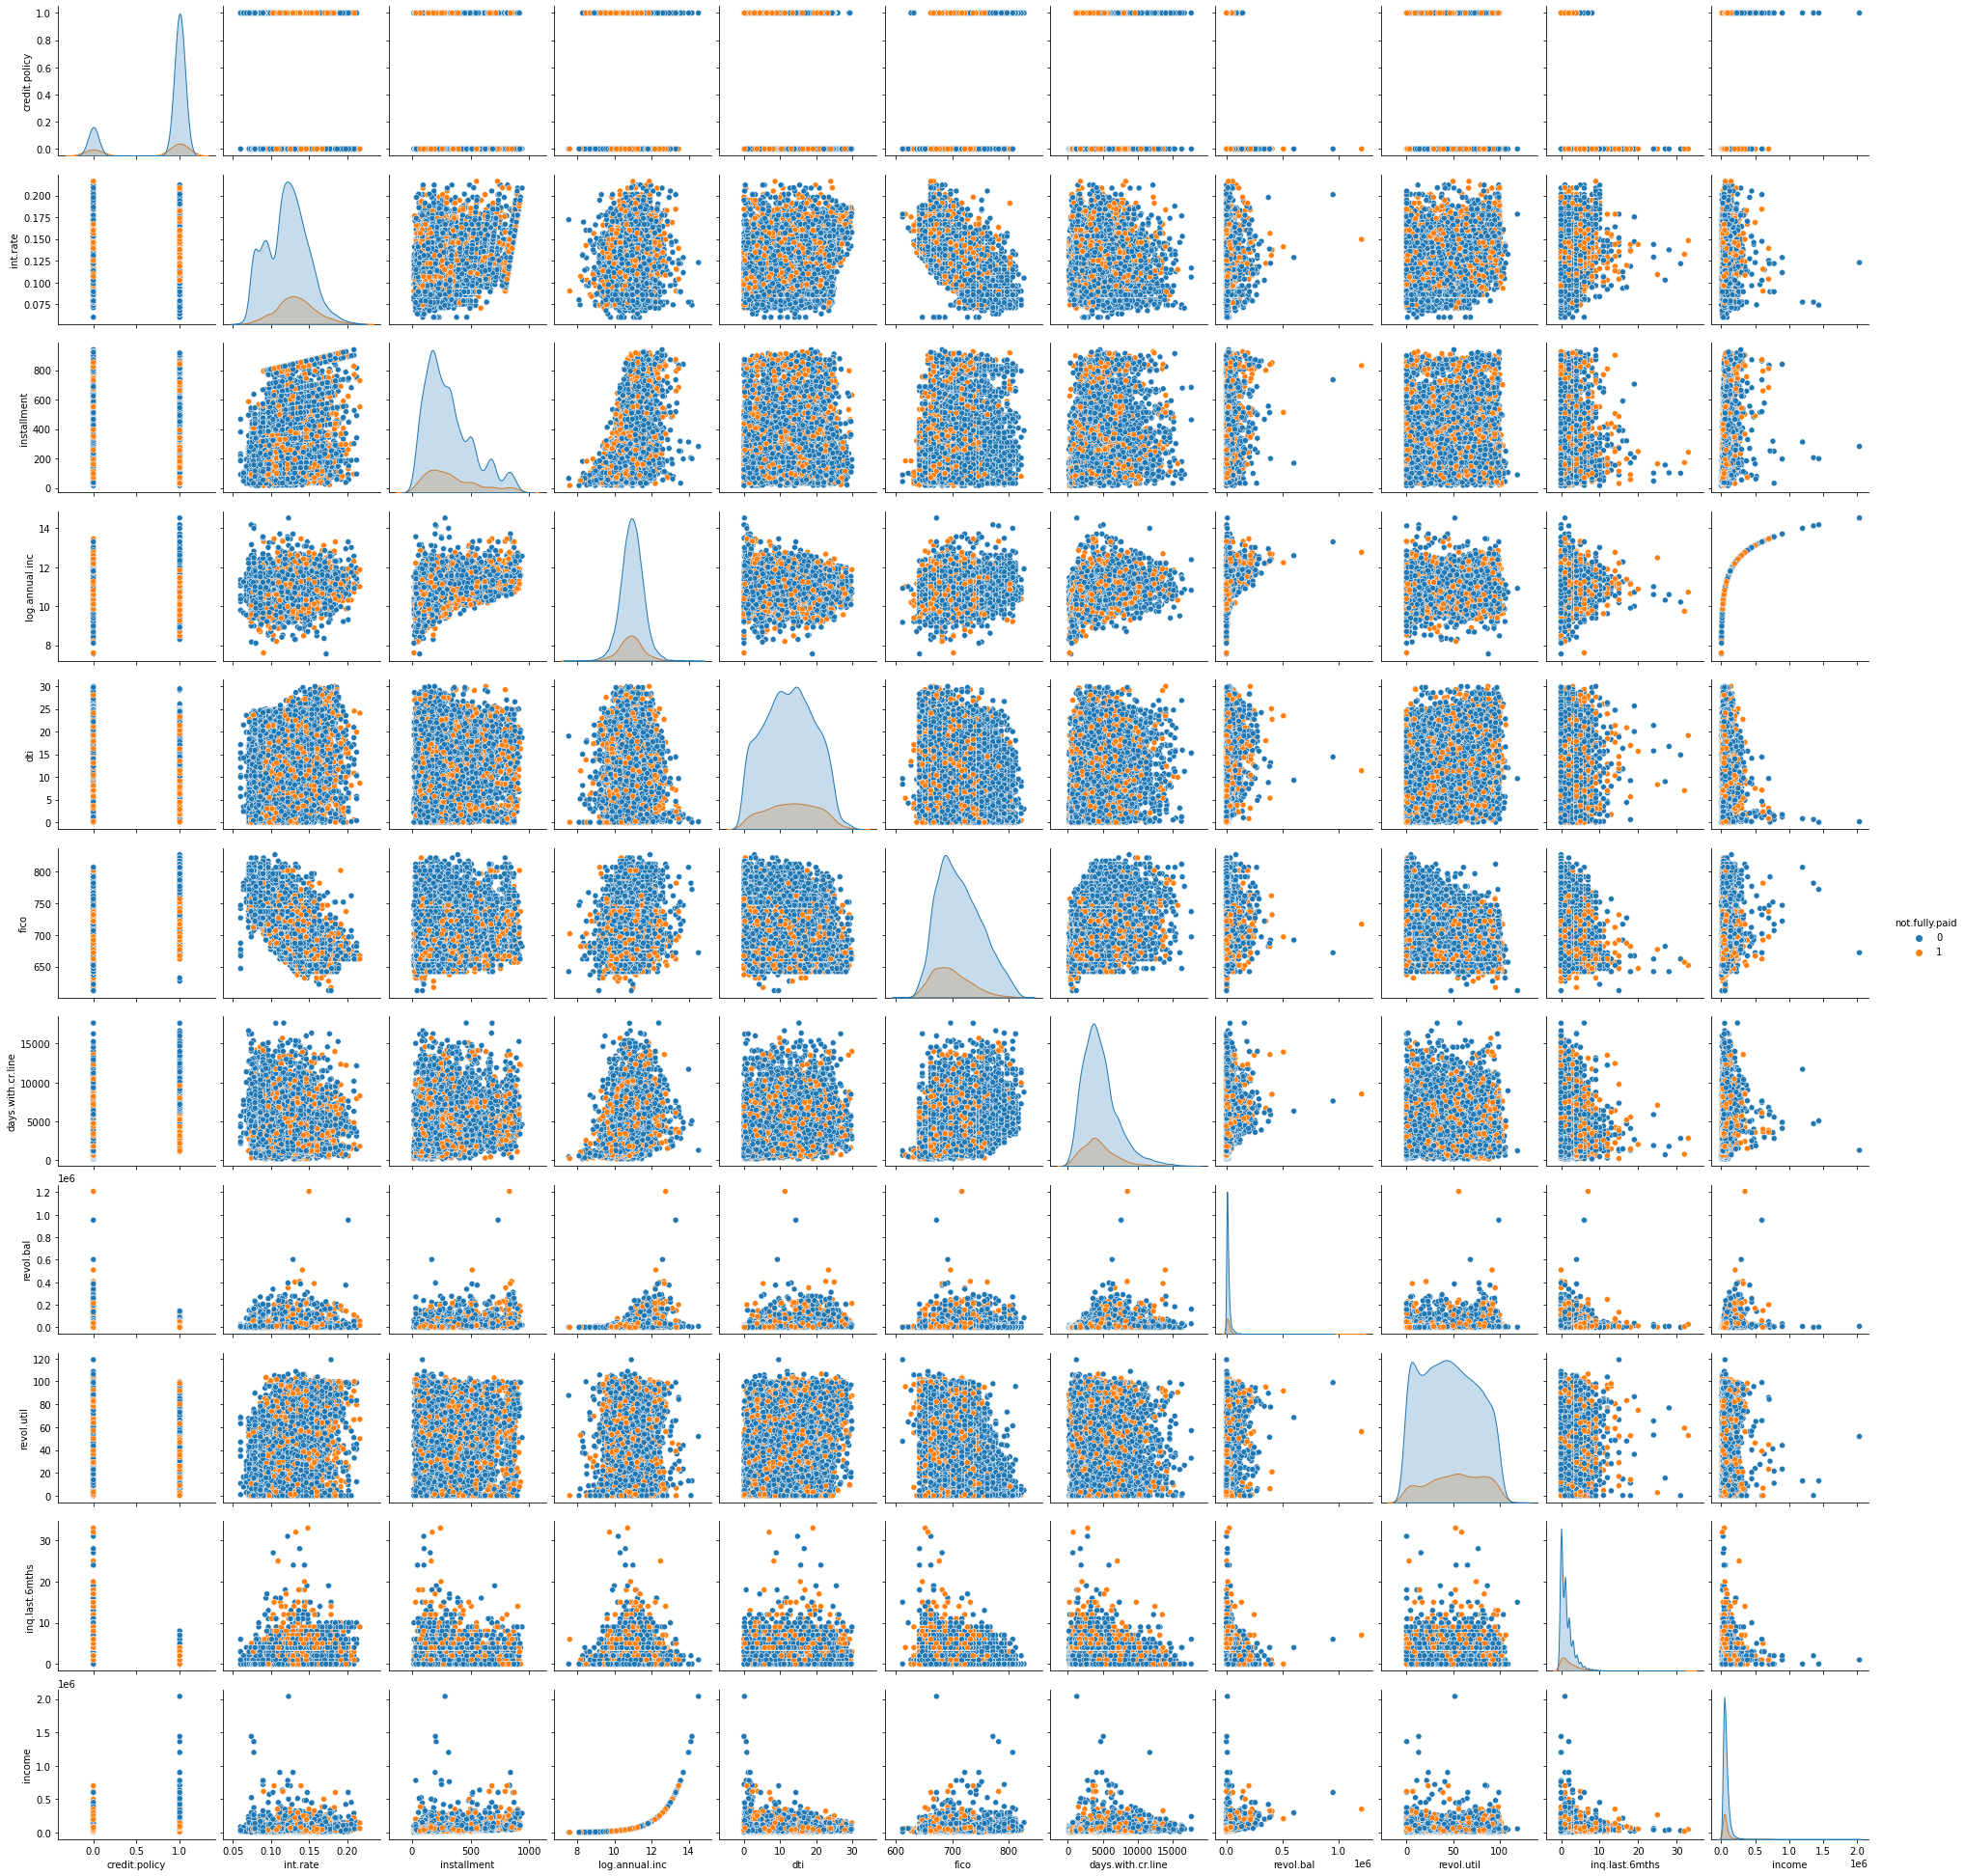

In [5]:
sns.pairplot(df,hue="not.fully.paid")

## Solutions

-14.812743547869088 4.227100096647354e-49


<AxesSubplot:xlabel='fico', ylabel='Count'>

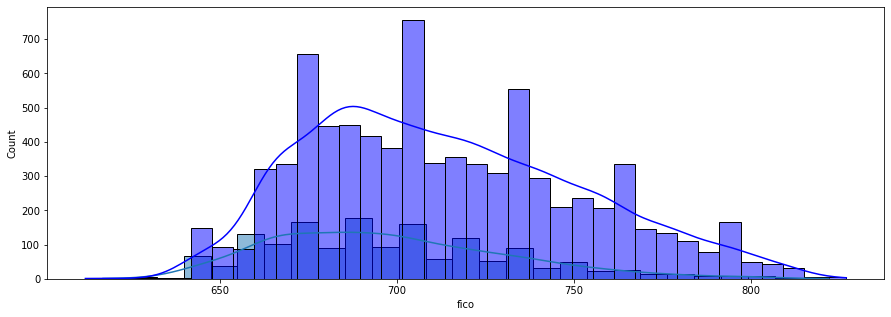

In [8]:
dfPd = df[df["not.fully.paid"] == 1].fico
dfNPd = df[df["not.fully.paid"] == 0].fico
stat, pval = ss.ttest_ind(dfPd, dfNPd)
print(stat,pval)

sns.histplot(dfPd, kde=True )
sns.histplot(dfNPd, kde=True, color='Blue')

36.36259987408664 2.6100416830751396e-271


<AxesSubplot:xlabel='fico', ylabel='Count'>

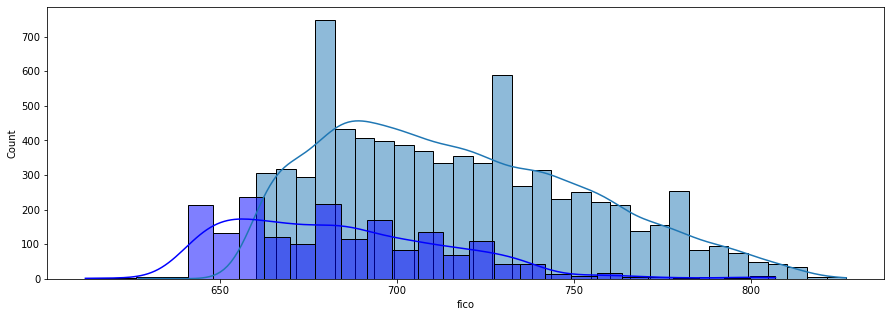

In [9]:
dfRw = df[df["credit.policy"] == 1].fico
dfNRw = df[df["credit.policy"] == 0].fico
stat1, pval1 = ss.ttest_ind(dfRw, dfNRw)
print(stat1,pval1) 
sns.histplot(dfRw, kde=True )
sns.histplot(dfNRw, kde=True, color='Blue')

In [10]:
dfRw= df[df["credit.policy"]==1]["log.annual.inc"]
dfNRw=df[df["credit.policy"]==0]["log.annual.inc"]
stat2, pval2 = ss.ttest_ind(dfRw,dfNRw)
print(stat2,pval2)

3.4178817682392073 0.0006337324172012597


In [14]:
from statsmodels.stats.power import TTestPower
powerTest = TTestPower()
ces = thinkstats2.CohenEffectSize(dfRw,dfNRw)
alpha = .05
nobs = len(dfRw)  + len(dfNRw)

pow = powerTest.power(effect_size=ces, nobs=nobs, alpha=alpha)
print(pow,  ces)


np = powerTest.solve_power(ces, power=.85, nobs=None, alpha=alpha)
np

1.0 0.08813984185782714


1157.6455504969408

In [16]:

df["income"].mean()

68402.03071015503

0.6210290601166143
0.5056178217400077
0.30390788935426843


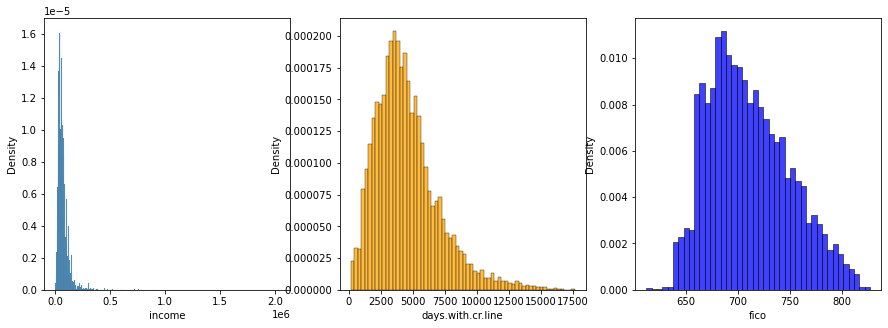

In [21]:
fig, axs = plt.subplots(ncols=3)
sns.histplot(df["income"], ax=axs[0], stat="density")
sns.histplot(df["days.with.cr.line"], color="Orange", ax=axs[1], stat="density")
sns.histplot(df["fico"], color="Blue",ax=axs[2], stat="density")

Skew_income = thinkstats2.PearsonMedianSkewness(df["income"])
Skew_dwcl = thinkstats2.PearsonMedianSkewness(df["days.with.cr.line"])
Skew_fico= thinkstats2.PearsonMedianSkewness(df["fico"])

print(Skew_income)
print(Skew_dwcl)
print(Skew_fico)